## Töötukassa data
### Making a pull request from tootukassa api and converting the json format to pandas dataframe

In [1]:
import pandas as pd
import requests

# Replace with the correct API endpoint and parameters
url = "https://www.tootukassa.ee/api/toopakkumised"

# If there's authentication, add the necessary headers or params
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()  # This assumes the response is in JSON format
else:
    print("Failed to retrieve data:", response.status_code)

Failed to retrieve data: 401


In [2]:
data = pd.DataFrame(data)

NameError: name 'data' is not defined

In [3]:
data.to_csv('tootukassa0212.csv', index=False)

NameError: name 'data' is not defined

### Combining pulls from several days and dropping duplicates

In [ ]:
import pandas as pd

# Load the datasets
files = [
    'tootukassa0212.csv',
    'tootukassa1211.csv',
    'tootukassa1511.csv',
    'tootukassa1611.csv',
    'tootukassa1711.csv',
    'tootukassa1911.csv',
    'tootukassa2611.csv',
    'tootukassa2911.csv'
]

# Combine all datasets into one DataFrame and remove duplicates
combined_df = pd.concat([pd.read_csv(file) for file in files]).drop_duplicates()

# Display basic information about the combined dataset
combined_df.info()


In [ ]:
# Resetting the index of the combined DataFrame to ensure it is properly ordered after concatenation and deduplication
combined_df.reset_index(drop=True, inplace=True)

# Displaying the updated DataFrame information to confirm the index fix
combined_df


In [ ]:
combined_df.drop_duplicates(subset=['TOOPAKKUMINE_NUMBER'], keep='first', inplace=True, ignore_index=True)

In [ ]:
combined_df.to_csv('tootukassacombined.csv', index=False)

### Importing LINKEDIN dataset and comparing it to Töötukassa

In [5]:
tootukassa_df = pd.read_csv('tootukassacombined.csv')

In [6]:
df = pd.read_csv('tootukassacombined.csv')

In [7]:
wages_df = pd.read_csv('df_main_wages.csv')

In [8]:
main_df = pd.read_csv('df_main.csv')

C:\Users\reser\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\reser\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\reser\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


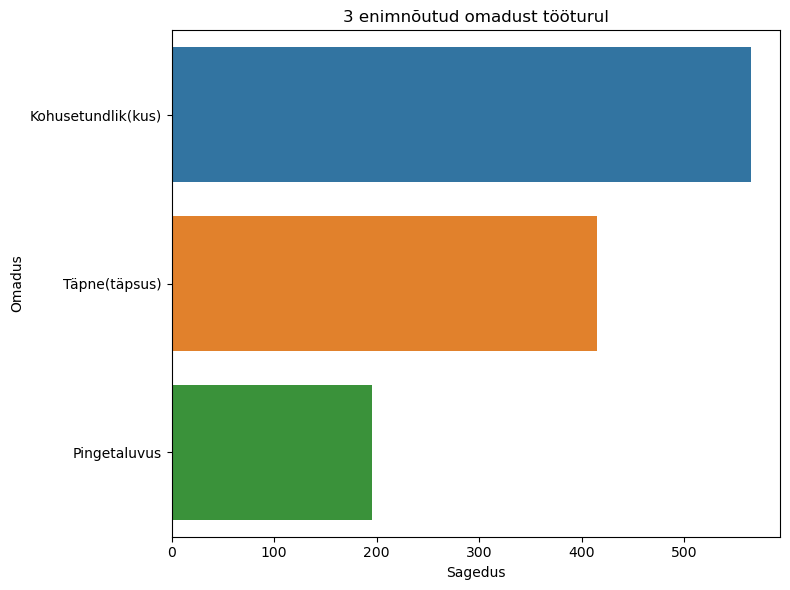

In [11]:
from collections import Counter
import re

# Extracting the "NOUDED" column
nouded_data = df['NOUDED'].dropna()

# Preprocess the text: lowercasing, removing special characters and numbers
preprocessed_nouded = nouded_data.str.lower().str.replace('[^a-zA-Zäöüõ\s]', '', regex=True)

# Tokenizing the words and creating a frequency distribution
word_list = ' '.join(preprocessed_nouded).split()
word_freq = Counter(word_list)

# Displaying the most common words
most_common_words = word_freq.most_common(20)
most_common_words

# Combining the counts for 'kohusetundlik' + 'kohusetundlikkus', 'täpne' + 'täpsus', and 'pingetaluvus' + 'pinget'
combined_counts = {
    'Kohusetundlik(kus)': word_freq['kohusetundlik'] + word_freq['kohusetundlikkus'],
    'Täpne(täpsus)': word_freq['täpne'] + word_freq['täpsus'],
    'Pingetaluvus': word_freq['pingetaluvus'] # No 'pinget' found in the list
}

# Creating a DataFrame for plotting
combined_counts_df = pd.DataFrame(list(combined_counts.items()), columns=['Omadus', 'Sagedus'])

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Sagedus', y='Omadus', data=combined_counts_df)
plt.title('3 enimnõutud omadust tööturul')
plt.xlabel('Sagedus')
plt.ylabel('Omadus')
plt.tight_layout()

plt.show()


C:\Users\reser\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\reser\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\reser\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\reser\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

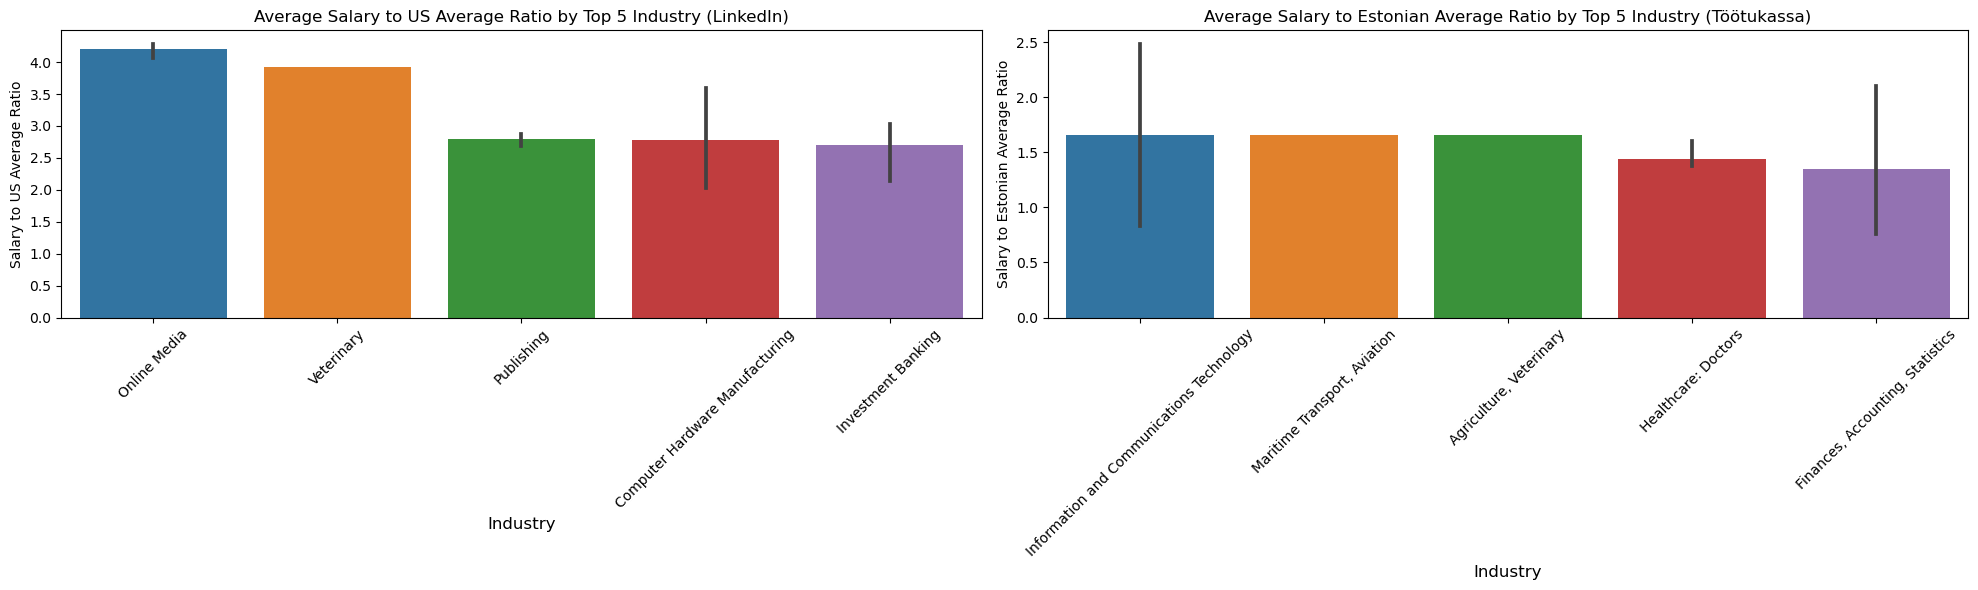

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'wages_df' and 'tootukassa_df' are already defined and have the necessary columns as per the provided code
# Also assuming 'usd_to_eur_conversion_rate' is defined
usd_to_eur_conversion_rate = 0.85  # Example conversion rate, please replace with the actual rate

# Define the average yearly wages for the US and Estonia in their respective currencies
us_average_yearly_wage = 77463  # in USD
ee_average_yearly_wage = 21744  # in EUR

# Convert US average yearly wage to EUR
us_average_yearly_wage_eur = us_average_yearly_wage * usd_to_eur_conversion_rate

# Calculate the ratio of industry salary to the average salary for the US and Estonia
# For the US data (LinkedIn data assumed to be 'wages_df')
wages_df['salary_to_us_average_ratio'] = wages_df['yearly_salary_eur'] / us_average_yearly_wage_eur

# For the Estonian data (Töötukassa data assumed to be 'tootukassa_df')
tootukassa_df['salary_to_ee_average_ratio'] = tootukassa_df['yearly_salary'] / ee_average_yearly_wage

# Plotting the data showing the ratio to the average salary for the top 5 industries side by side

# Setting up the figure for side-by-side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# First, for the US data (LinkedIn data)
top_us_industries = wages_df.groupby('industry')['salary_to_us_average_ratio'].mean().nlargest(5).index
sns.barplot(
    x='industry',
    y='salary_to_us_average_ratio',
    data=wages_df[wages_df['industry'].isin(top_us_industries)],
    order=top_us_industries,
    ax=axes[0]
)
axes[0].set_title('Average Salary to US Average Ratio by Top 5 Industry (LinkedIn)')
axes[0].set_xlabel('Industry', fontsize=12)
axes[0].set_ylabel('Salary to US Average Ratio')
axes[0].tick_params(axis='x', rotation=45, labelsize=10)

# Second, for the Estonian data (Töötukassa data)
top_ee_industries = tootukassa_df.groupby('GRUPP_NIMETUS')['salary_to_ee_average_ratio'].mean().nlargest(5).index
sns.barplot(
    x='GRUPP_NIMETUS',
    y='salary_to_ee_average_ratio',
    data=tootukassa_df[tootukassa_df['GRUPP_NIMETUS'].isin(top_ee_industries)],
    order=top_ee_industries,
    ax=axes[1]
)
axes[1].set_title('Average Salary to Estonian Average Ratio by Top 5 Industry (Töötukassa)')
axes[1].set_xlabel('Industry', fontsize=12)
axes[1].set_ylabel('Salary to Estonian Average Ratio')
axes[1].tick_params(axis='x', rotation=45, labelsize=10)

# Customize x-axis labels for the second subplot (Estonian data)
custom_x_labels = [
    'Information and Communications Technology',
    'Maritime Transport, Aviation',
    'Agriculture, Veterinary',
    'Healthcare: Doctors',
    'Finances, Accounting, Statistics'
]
axes[1].set_xticks(range(len(custom_x_labels)))
axes[1].set_xticklabels(custom_x_labels, rotation=45, fontsize=10)

# Adjust layout
plt.tight_layout()

# Save the plot as a PDF
plt.savefig('industry_salary_comparison.pdf')

# Display the plot
plt.show()


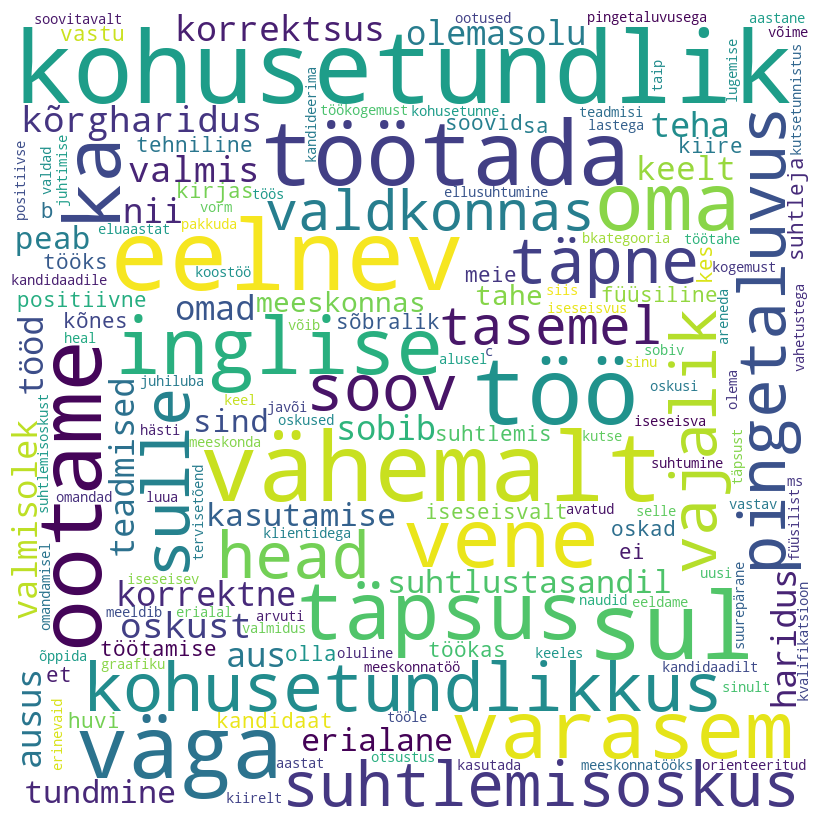

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Loading the Töötukassa dataset again to work on the "NOUDED" column (assuming it's already loaded)

# Preprocessing the "NOUDED" column: lowercasing, removing special characters and numbers
preprocessed_nouded = tootukassa_df['NOUDED'].dropna().str.lower().str.replace('[^a-zA-Zäöüõ\s]', '', regex=True)

# Tokenizing the words and creating a frequency distribution
nouded_word_list = ' '.join(preprocessed_nouded).split()
nouded_word_freq = Counter(nouded_word_list)

# Excluding the first 14 most common words from the frequency distribution
top_n = 14
nouded_word_freq = dict(nouded_word_freq.most_common()[top_n:])

# Generating the word cloud without the first 14 most common words
nouded_wordcloud_without_top_words = WordCloud(width=800, height=800,
                                               background_color='white',
                                               min_font_size=10).generate_from_frequencies(nouded_word_freq)

# Plotting the Word Cloud image for the "NOUDED" column without the first 14 most common words
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(nouded_wordcloud_without_top_words)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


AttributeError: Text.set() got an unexpected keyword argument 'labelsize'

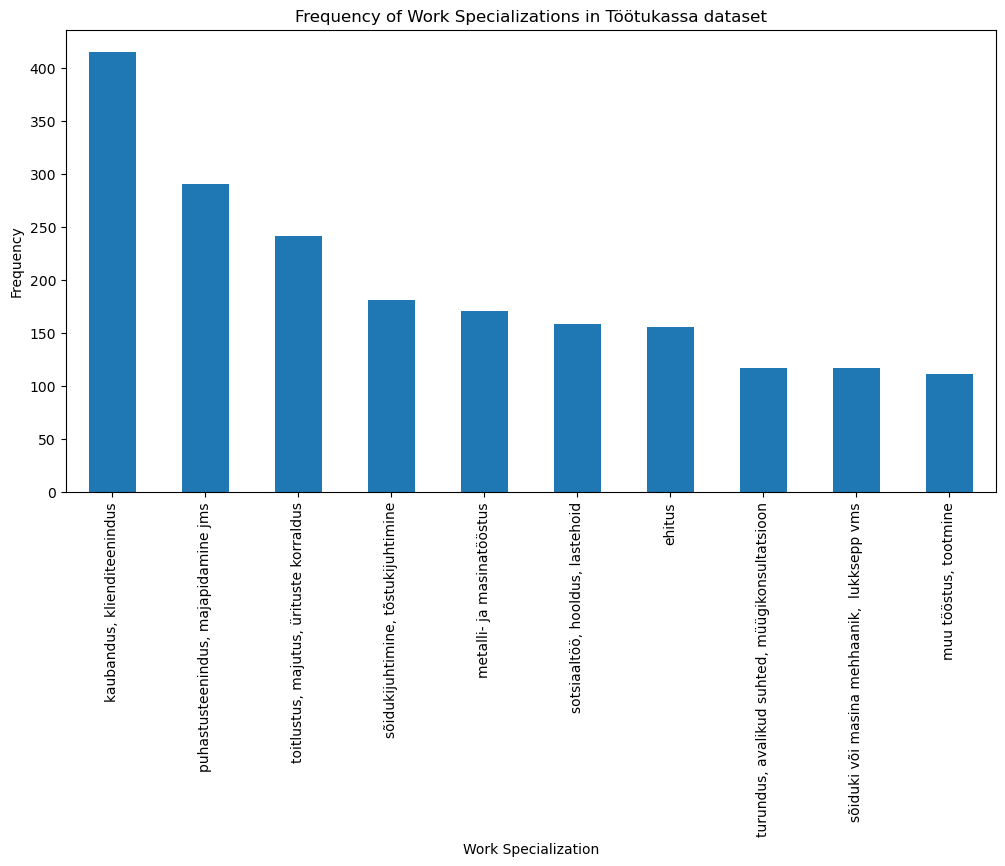

In [20]:
import matplotlib.pyplot as plt
# Grouping by 'work_specialization' and getting the count for each specialization
work_specialization_counts = tootukassa_df['GRUPP_NIMETUS'].value_counts()

# Taking top 30 specializations based on count
top_30_specializations = work_specialization_counts.head(10)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
top_30_specializations.plot(kind='bar')
plt.xlabel('Work Specialization')
plt.ylabel('Frequency')
plt.title('Frequency of Work Specializations in Töötukassa dataset')
plt.xticks(rotation=90, labelsize=10)  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()

In [21]:
# Updating the category mapping and adjusting the code to sum the values for 'Health Care Providers'

# Defining the Estonian to English category mapping for the specified categories
tootukassa_to_df_main_mapping = {
    'infotehnoloogia, telekommunikatsioon': 'Information Technology',
    'haridus: juhid ja pedagoogid': 'Education',
    'ettevõtte, organisatsiooni juhtimine, kvaliteedijuhtimine': 'Management',
    'finants, raamatupidamine, statistika': 'Accounting/Auditing',
    'kaubandus, klienditeenindus': 'Customer Service'
}

# Adjusting values for 'Health Care Providers'
tootukassa_value_healthcare = grupp_nimetuse_proportions.get('tervishoid:arstid', 0) + grupp_nimetuse_proportions.get('tervishoid: meditsiini õde', 0)
main_wages_value_healthcare = work_specialization_proportions.get('Health Care Providers', 0)

# Finding equivalent or similar specializations from df_main_wages
tootukassa_to_df_main_equivalents = {}
for est_category, eng_category in tootukassa_to_df_main_mapping.items():
    if eng_category != 'Health Care Providers':
        tootukassa_value = grupp_nimetuse_proportions.get(est_category, 0)
        main_wages_value = work_specialization_proportions.get(eng_category, 0)
    else:
        tootukassa_value = tootukassa_value_healthcare
        main_wages_value = main_wages_value_healthcare
    tootukassa_to_df_main_equivalents[eng_category] = [tootukassa_value, main_wages_value]

# Creating DataFrame for plot
comparison_df = pd.DataFrame(tootukassa_to_df_main_equivalents, index=['Tootukassa', 'LinkedIn']).T
comparison_colors = ['C1', 'C0']

# Plotting the comparison
comparison_df.plot(kind='bar', figsize=(12, 6), color=comparison_colors)
plt.xlabel('Specialization')
plt.ylabel('Proportion')
plt.title('Comparison of Job Specializations Proportions Between Tootukassa and LinkedIn')
plt.xticks(rotation=45)
plt.legend(['Töötukassa', 'LinkedIn'])
plt.tight_layout()
plt.show()


NameError: name 'grupp_nimetuse_proportions' is not defined

In [ ]:
# Assuming 'wages_df' and 'tootukassa_df' are already defined and have the necessary columns as per the provided code
# Also assuming 'usd_to_eur_conversion_rate' is defined
usd_to_eur_conversion_rate = 0.93  # Example conversion rate, please replace with the actual rate

# Define the average yearly wages for the US and Estonia in their respective currencies
us_average_yearly_wage = 77463  # in USD
ee_average_yearly_wage = 21744  # in EUR

# Convert US average yearly wage to EUR
us_average_yearly_wage_eur = us_average_yearly_wage * usd_to_eur_conversion_rate

# Calculate the ratio of industry salary to the average salary for the US and Estonia
# For the US data (LinkedIn data assumed to be 'wages_df')
wages_df['salary_to_us_average_ratio'] = wages_df['yearly_salary_eur'] / us_average_yearly_wage_eur

# For the Estonian data (Töötukassa data assumed to be 'tootukassa_df')
tootukassa_df['salary_to_ee_average_ratio'] = tootukassa_df['yearly_salary'] / ee_average_yearly_wage

# Setting a lighter color theme
sns.set_theme(style="light")

# Plotting the data showing the ratio to the average salary for the top 5 industries side by side

# Setting up the figure for side-by-side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# First, for the US data (LinkedIn data)
top_us_industries = wages_df.groupby('industry')['salary_to_us_average_ratio'].mean().nlargest(5).index
sns.barplot(
    x='industry',
    y='salary_to_us_average_ratio',
    data=wages_df[wages_df['industry'].isin(top_us_industries)],
    order=top_us_industries,
    ax=axes[0]
)
axes[0].set_title('Average Salary to US Average Ratio by Top 5 Industry (LinkedIn)')
axes[0].set_xlabel('Industry', fontsize=12)
axes[0].set_ylabel('Salary to US Average Ratio')
axes[0].tick_params(axis='x', rotation=45, labelsize=10)

# Second, for the Estonian data (Töötukassa data)
# Translating the Estonian labels to English
tootukassa_translation = {
    # Example translations; please update with accurate translations
    'infotehnoloogia, telekommunikatsioon': 'Information Technology',
    'haridus: juhid ja pedagoogid': 'Education: Leaders and Educators',
    # Add more translations as needed
}

# Applying translations to the tootukassa_df
tootukassa_df['Translated_GRUPP_NIMETUS'] = tootukassa_df['GRUPP_NIMETUS'].map(tootukassa_translation).fillna(tootukassa_df['GRUPP_NIMETUS'])

top_ee_industries = tootukassa_df.groupby('Translated_GRUPP_NIMETUS')['salary_to_ee_average_ratio'].mean().nlargest(5).index
sns.barplot(
    x='Translated_GRUPP_NIMETUS',
    y='salary_to_ee_average_ratio',
    data=tootukassa_df[tootukassa_df['Translated_GRUPP_NIMETUS'].isin(top_ee_industries)],
    order=top_ee_industries,
    ax=axes[1]
)
axes[1].set_title('Average Salary to Estonian Average Ratio by Top 5 Industry (Töötukassa)')
axes[1].set_xlabel('Industry', fontsize=12)
axes[1].set_ylabel('Salary to Estonian Average Ratio')
axes[1].tick_params(axis='x', rotation=45, labelsize=10)

# Adjust layout
plt.tight_layout()

# Save the plot as a PDF
plt.savefig('/mnt/data/industry_salary_comparison.pdf')

# Display the plot
plt.show()


In [ ]:
# Excluding common conjunctions and prepositions from the word cloud
excluded_words = ['and', 'to', 'the', 'of', 'a', 'in', 'with', 'for', 'or', 'is', 'as', 'our', 'you', 'on', 'we',]

# Filtering the word list to exclude the specified words
filtered_words = {word: count for word, count in small_subset_description_most_common_words if word not in excluded_words}

# Excluding additional specified words
newly_excluded_words = ['support', 'their', 'from', 'required', 'company', 'have', 'role', 'new']
total_excluded_words_updated = total_excluded_words + newly_excluded_words

# Filtering the 50-word list to exclude the newly specified words
final_filtered_words = {word: count for word, count in extended_word_list if word not in total_excluded_words_updated}

# Generating the wordcloud with the final filtered word list
final_filtered_wordcloud = WordCloud(width = 800, height = 800, 
                                     background_color ='white', 
                                     min_font_size = 10).generate_from_frequencies(final_filtered_words)

# Plotting the final filtered WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(final_filtered_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

plt.show()
